In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import glob
from LessonFunctions import *
import pickle

In [2]:
# Parameters to be used in the implementation

spatial = 32
histbin = 32
ystart = 400
ystop = 650
scale = 1
spatial_size = (spatial, spatial)
cell_per_block = 2
pixels_per_cel = 8
orient = 9
hog_channel = 'ALL'
colorspace = 'HLS'

In [3]:
# Read in car and non-car images
car_images = glob.glob('./Vehicle/*.png')
cars = []
notcars = []
for image1 in car_images:
    cars.append(image1)

non_car_images = glob.glob('./NonVehicle/*.png')
for image in non_car_images:
    notcars.append(image)

In [4]:

# print(len(cars))
# print(len(notcars))

5966
5068


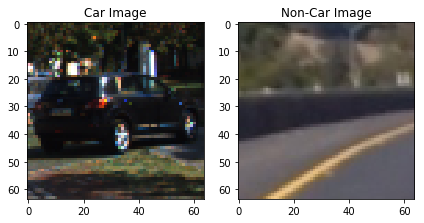

In [5]:
# Example images from the dataset
img = LF.read_image(image1)
img2 = LF.read_image(image)
fig = plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.title('Car Image')
plt.subplot(122)
plt.imshow(img2)
plt.title('Non-Car Image')
fig.tight_layout()
plt.show()

In [6]:
print(img.shape)

(64, 64, 3)


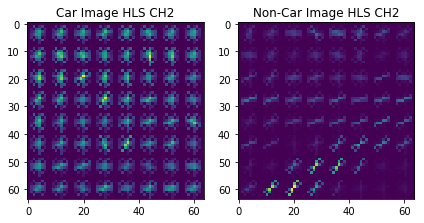

In [7]:
# Example images from the HOG transform

img = LF.imageCc(img, color_space='HLS')
img2 = LF.imageCc(img2, color_space='HLS')
ch = img[:,:,2]
ch1 = img2[:,:,2]
features, imgA = LF.get_hog_features(ch, orient, pixels_per_cel, cell_per_block, vis=True, feature_vec=True)
# LF.get_hog_features(img2, orient, pixels_per_cel, cell_per_block, vis=True, feature_vec=True)
features, imgB = LF.get_hog_features(ch1, orient, pixels_per_cel, cell_per_block, vis=True, feature_vec=True)
fig = plt.figure()
plt.subplot(121)
plt.imshow(imgA)
plt.title('Car Image HLS CH2')
plt.subplot(122)
plt.imshow(imgB)
plt.title('Non-Car Image HLS CH2')
fig.tight_layout()
plt.show()

In [8]:
# feature extration from the dataset

car_features = LF.extract_features(cars, color_space=colorspace, spatial_size=(spatial, spatial),
                        hist_bins=histbin)
notcar_features = LF.extract_features(notcars, color_space=colorspace, spatial_size=(spatial, spatial),
                        hist_bins=histbin)

In [9]:
# Pre-processing the dataset

import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)                        
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    scaled_X, y, test_size=0.2, random_state=rand_state)

C:\Users\nxa04630\AppData\Local\Continuum\Anaconda3\envs\IntroToTensorFlow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# Classifier declaration and training

print('Using spatial binning of:',spatial,
    'and', 'histogram bins of:', histbin)
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

# save the classifier
with open('classifier.pkl', 'wb') as fid:
            pickle.dump(svc, fid)
        
with open('scaler.pkl', 'wb') as fid:
    pickle.dump(X_scaler, fid)

Using spatial binning of: 32 and histogram bins of: 32
Feature vector length: 8460
20.89 Seconds to train SVC...
Test Accuracy of SVC =  0.9959
My SVC predicts:  [ 0.  1.  1.  1.  1.  0.  0.  0.  1.  1.]
For these 10 labels:  [ 0.  1.  1.  1.  1.  0.  0.  0.  1.  1.]
0.008 Seconds to predict 10 labels with SVC


(720, 1280, 3)


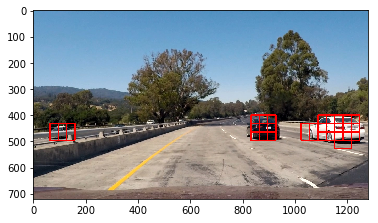

(720, 1280, 3)


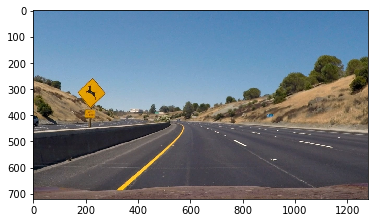

(720, 1280, 3)


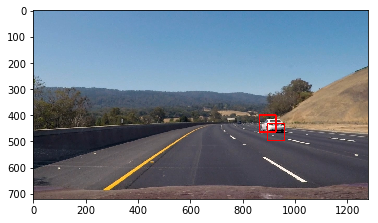

(720, 1280, 3)


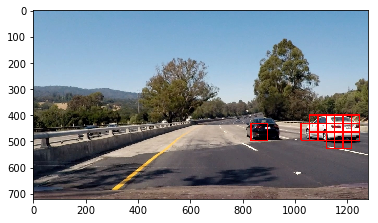

(720, 1280, 3)


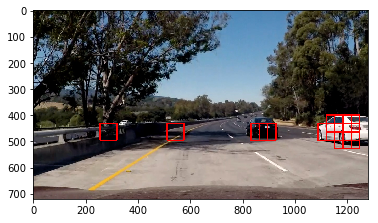

(720, 1280, 3)


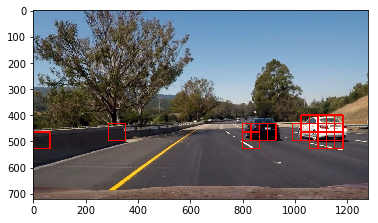

In [11]:
# single functions to test on images
%matplotlib inline
with open('classifier.pkl', 'rb') as fid:
    svc = pickle.load(fid)
from LessonFunctions import *

# find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):

for img in glob.glob('./test_images/test*.png'):
    image = LF.read_image(img)
    print(image.shape)
        
    # Just run for the middle distance detection
    out_img, box_list = LF.find_cars(image, ystart, ystop, 
                                      scale,
                                      svc, X_scaler,
                                      'ALL',
                                      orient,
                                      pixels_per_cel,
                                      cell_per_block,
                                      spatial_size=spatial_size,
                                      hist_bins=histbin,
                                    color_space=colorspace)

    # Display the results
    plt.imshow(out_img)
    plt.show()

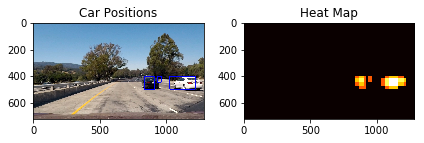

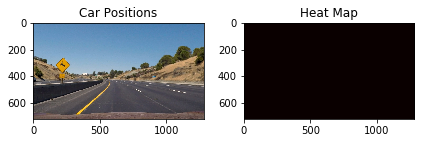

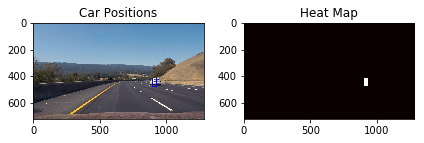

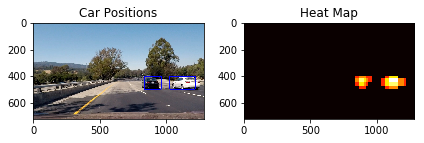

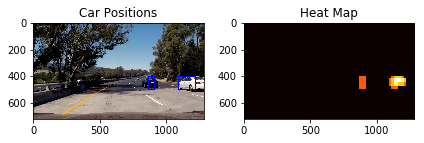

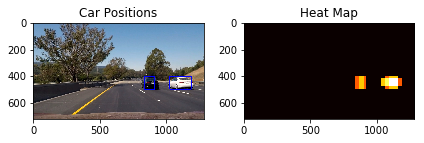

In [14]:
# pipeline to test on images
%matplotlib inline

LF.process_image_VD(svc, X_scaler)

In [15]:
# calling pipeline to process the video
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

white_output = 'C:\\Users\\nxa04630\\Desktop\\project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("C:\\Users\\nxa04630\\Desktop\\project_video.mp4")
white_clip = clip1.fl_image(LF.process_video_VD) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video C:\Users\nxa04630\Desktop\project_video_output.mp4
[MoviePy] Writing video C:\Users\nxa04630\Desktop\project_video_output.mp4


100%|█████████████████████████████████████▉| 1260/1261 [14:35<00:00,  1.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: C:\Users\nxa04630\Desktop\project_video_output.mp4 

Wall time: 14min 37s
